<a href="https://colab.research.google.com/github/tianiachan/Data640DeepLearning/blob/main/Tiania__Model_Fashion_MNIST_Database.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#import libraries for ML models
import numpy as np
import pandas as pd
import os
import tarfile
import tensorflow.keras 
from tensorflow.keras.datasets import fashion_mnist

<p>Now lets load up the data.</p>

In [6]:
#function to visualize the image in the file
def show(image):
    """
    Render a given numpy.uint8 2D array of pixel data.
    """
    from matplotlib import pyplot
    import matplotlib as mpl
    fig = pyplot.figure()
    ax = fig.add_subplot(1,1,1)
    imgplot = ax.imshow(image, cmap=mpl.cm.Greys)
    imgplot.set_interpolation('nearest')
    ax.xaxis.set_ticks_position('top')
    ax.yaxis.set_ticks_position('left')
    pyplot.show()

In [7]:
#import the data in from fashion mnist
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()
train_y = tensorflow.keras.utils.to_categorical(train_y, 10)
test_y = tensorflow.keras.utils.to_categorical(test_y, 10)

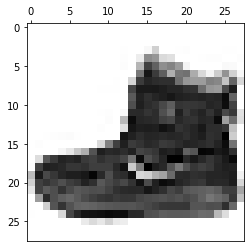

In [8]:
#show first image in training data
show(train_x[0])

In [9]:
#get the shape of the image which is 60000 instances of 28x28 pixel sized images
train_x.shape

(60000, 28, 28)

<p>Now that we've imported the data, we'll need to start importing what we need from Keras to build our network. Below is a basic network. Note that the images are greyscale, so there is no color channel like there is in some of the other datasets.</p>

<p>Also, since there's no color channel, we'll use "1D" layers not "2D" layers as are used when we have channels for colors.</p>

In [ ]:
#additional libraries to add to top after understanding this model better
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, BatchNormalization, Flatten, Dense

<p>Now it's time for us to start building the network. Build below is a sample network you can play with as a starting point for your assignment. Feel free to expand on this, or start your own from scratch!</p>

In [ ]:
model = Sequential()
model.add(Conv1D(filters = 236, kernel_size = 2,  input_shape = (28, 28)))
model.add(MaxPooling1D(pool_size = 2))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Conv1D(filters = 128, kernel_size = 2))
model.add(MaxPooling1D(pool_size = 2))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(units = 10, activation = 'softmax'))

In [ ]:
model.compile(loss = 'categorical_crossentropy', 
              optimizer = tensorflow.keras.optimizers.Adadelta(), 
              metrics = ['accuracy'])

In [ ]:
model.fit(train_x, train_y, epochs = 10, batch_size = 128)

Epoch 1/10
469/469 [==============================] - 19s 41ms/step - loss: 2.7640 - accuracy: 0.1699
Epoch 2/10
469/469 [==============================] - 19s 41ms/step - loss: 2.2365 - accuracy: 0.2787
Epoch 3/10
469/469 [==============================] - 19s 41ms/step - loss: 1.8726 - accuracy: 0.3790
Epoch 4/10
469/469 [==============================] - 19s 41ms/step - loss: 1.6294 - accuracy: 0.4444
Epoch 5/10
469/469 [==============================] - 19s 42ms/step - loss: 1.4609 - accuracy: 0.4948
Epoch 6/10
469/469 [==============================] - 20s 43ms/step - loss: 1.3358 - accuracy: 0.5355
Epoch 7/10
469/469 [==============================] - 20s 42ms/step - loss: 1.2441 - accuracy: 0.5690
Epoch 8/10
469/469 [==============================] - 19s 41ms/step - loss: 1.1709 - accuracy: 0.5932
Epoch 9/10
469/469 [==============================] - 19s 41ms/step - loss: 1.1148 - accuracy: 0.6127
Epoch 10/10
469/469 [==============================] - 19s 41ms/step - loss: 1.069

<p>Now that we've trained the network, lets see how well it works on some unseen data!</p> 

In [ ]:
score = model.evaluate(test_x, test_y)
print('\nloss is: ' + str(score[0]))
print('accuracy is: ' + str(score[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.8870 - accuracy: 0.7005

loss is: 0.886969804763794
accuracy is: 0.7005000114440918
